<a href="https://colab.research.google.com/github/nik8839/deep_learning_project/blob/trial_1/samplle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
import os
from PIL import Image
import numpy as np

classes = []
data = []
Y = []

image_folder_path = '/content/drive/MyDrive/dataset'  # Change this to the path where your folders are extracted
folders = os.listdir(image_folder_path)
count = 0

for folder in folders:
    classes.append(folder)
    folder_path = os.path.join(image_folder_path, folder)
    if os.path.isdir(folder_path):
        print(f"Reading images from {folder}")
        images = os.listdir(folder_path)
        for image_name in images:
            Y.append(count)
            image_path = os.path.join(folder_path, image_name)
            image = Image.open(image_path)
            image = image.resize((100, 100), resample=Image.LANCZOS).convert('RGB')
            image_array = np.asarray(image)
            data.append(image_array)

        count += 1





Reading images from lightning
Reading images from rime
Reading images from glaze
Reading images from rainbow
Reading images from hail
Reading images from frost
Reading images from sandstorm
Reading images from rain
Reading images from snow
Reading images from fogsmog
Reading images from dew


In [5]:
# Convert the data list to a 4D numpy array
data = np.array(data)

# Convert the Y list to a numpy array
Y = np.array(Y)

# Check the shapes of data and Y
print("Shape of data:", data.shape)
print("Shape of Y:", Y.shape)

Shape of data: (6877, 100, 100, 3)
Shape of Y: (6877,)


In [ ]:
data

In [10]:
data[0].shape

(100, 100, 3)

In [ ]:
for fol in data:
  print(fol.shape)

In [ ]:
image_array

In [13]:
image_array.shape

(100, 100, 3)

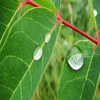

In [14]:
output_image = Image.fromarray(image_array)
output_image

In [9]:

import numpy as np

In [17]:
classes

['lightning',
 'rime',
 'glaze',
 'rainbow',
 'hail',
 'frost',
 'sandstorm',
 'rain',
 'snow',
 'fogsmog',
 'dew']

In [6]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets with a specific random seed (random_state)
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.2, random_state=42)

In [24]:
X_test.shape

(1376, 100, 100, 3)

In [7]:
import tensorflow as tf
from tensorflow.keras import layers,models
import keras

In [10]:
model=keras.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(100,100,3)),
    layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    # keras.layers.Dense(60000,activation='relu'),
     #keras.layers.Dense(40000,activation='relu'),
    # keras.layers.Dense(10000,activation='relu'),
    #keras.layers.Dense(5000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
     keras.layers.Dense(11,activation='softmax'),

])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']

)

In [ ]:
model.fit(X_train,y_train,epochs=10)


Epoch 1/10
172/172 [==============================] - 278s 2s/step - loss: 973.4514 - accuracy: 0.4245
Epoch 2/10
172/172 [==============================] - 298s 2s/step - loss: 4.8114 - accuracy: 0.6348
Epoch 3/10
125/172 [====================>.........] - ETA: 1:18 - loss: 1.6425 - accuracy: 0.7623